In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.lines as mlines

In [2]:
file_paths = {
    'Trondheim': 'error/error_trondheim.csv',
    'Tromsø': 'error/error_tromsø.csv',
    'Stavanger': 'error//error_stavanger.csv',
    'Oslo': 'error/error_oslo.csv',
    'Helsingfors': 'error/error_helsingfors.csv',
    'Bergen': 'error/error_bergen.csv'
}

In [3]:
# Create a dictionary to store the error data
error_data = {}

# Read each error CSV into a pandas DataFrame and store it in the dictionary
for city, file_path in file_paths.items():
    error_data[city] = pd.read_csv(file_path)

In [4]:
aneo_colors = ['#ffbb24', '#2f6cff', '#c7d7ff', '#ffe6a8', '#000000', '#3ed46f']

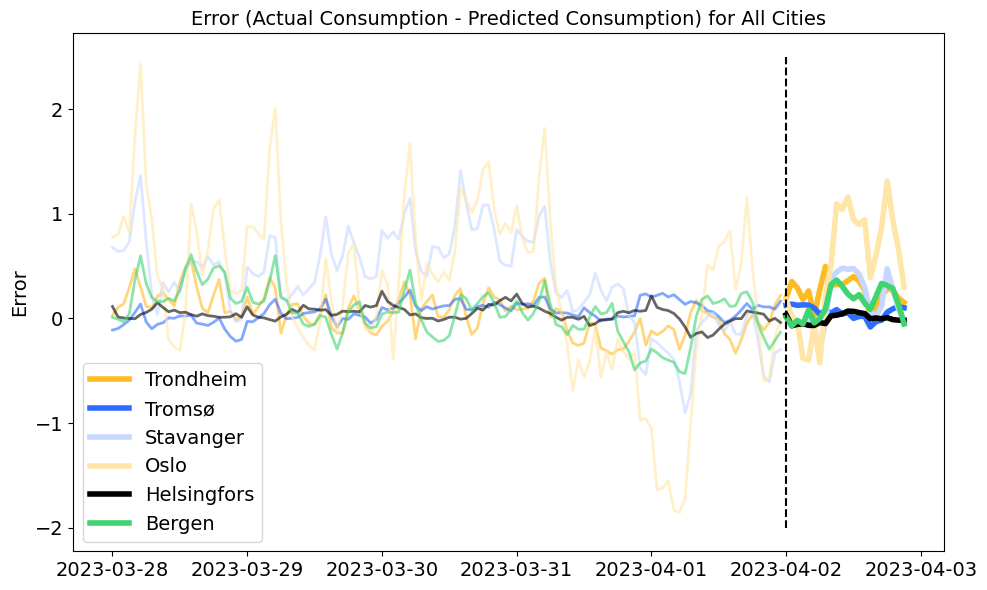

In [5]:
# Plotting all cities' errors on one line graph
plt.figure(figsize=(10, 6))

# Define the date to change color saturation
change_date = pd.to_datetime('2023-04-02')

legend_handles = []  # List to hold the legend handles

# Plot each city's error data
for (city, df), color in zip(error_data.items(), aneo_colors):
    df['time'] = pd.to_datetime(df['time'])
    
    # Data before the change_date
    before = df['time'] < change_date
    plt.plot(df['time'][before], df['error'][before], color=color, linewidth=2, alpha=0.6)
    
    # Data on or after the change_date
    on_or_after = df['time'] >= change_date
    plt.plot(df['time'][on_or_after], df['error'][on_or_after], color=color, linewidth=4, alpha=1)
    
    # Create a custom legend handle for this city
    legend_handles.append(mlines.Line2D([], [], color=color, linewidth=4, label=city))

# Finalizing the plot
plt.title('Error (Actual Consumption - Predicted Consumption) for All Cities', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(handles=legend_handles, fontsize=14)  # Use the custom legend handles here
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.vlines(x=change_date, ymin=-2 , ymax=2.5 , colors='black', linestyles='dashed')
plt.tight_layout()  # Adjust the layout

# Show the plot
plt.show()